## Apendix
In this appendix, one will find the data that did not quite fit into the final project.

Listed first is the health data that was not used because there was no clear way to combine the data sets. The health data had no column district, so it could not overlap with the other datasets. Therefore this data had to be scratched; however, it still makes for a compelling case on how poverty and inequalities in New York City affect a person's access to healthcare. This first section is the data cleaning.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

In [23]:
health = pd.read_csv('health.csv')
health.head()
print(health.shape)
#grabbing columns from data set
columns_we_want = [ "insuredgateway19","generalhealth", "visitnonpcp12m19", "pcp19","didntgetcare19","emp3", "insure5","birthsex","imputed_neighpovgroup4_1418", "fluvaccineshot","everhepavaccine","fruitveg19"]
health[columns_we_want]
health = health[columns_we_want]
#renaming columns
health = health.rename(columns = {'insuredgateway19' : 'insured', 'visitnonpcp12m19' : 'seen_a_doctor_in_12months?', 'pcp19' : 'primary_doctor', 'insure5': 'who_insures_you','emp3': 'employed', 'imputed_neighpovgroup4_1418': 'below_poverty','fruitveg19':'fruit_veggie_servings','everhepavaccine': 'revieved_hepatatis_vaccine','didntgetcare19': 'didnt_get_care'})
health.head()

(8253, 152)


,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2,1.0,3.0,2.0
1,1.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,2,2.0,2.0,1.0
2,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2,1.0,3.0,2.0
3,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3,2.0,2.0,2.0
4,1.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,4,2.0,2.0,2.0


This part of the data cleaning was used to change the data from number representatations to categories with clearer meaning.

In [24]:
#Renaming data points in below_poverty and other columns I am preforming analysis on so that the data is understandable to the user. 
health_copy1 = health.copy()
health_copy1.loc[health_copy1.below_poverty == 1, "below_poverty"] = "0 - <10% (low pov)%"
health_copy1.loc[health_copy1.below_poverty == 2, "below_poverty"] = "10 - <20%"
health_copy1.loc[health_copy1.below_poverty == 3, "below_poverty"] = "20 - <30%"
health_copy1.loc[health_copy1.below_poverty == 4, "below_poverty"] = "30 - <100% (very high)"

health_copy1.loc[health_copy1.insured == 1, "insured"] = "yes"
health_copy1.loc[health_copy1.insured == 2, "insured"] = "no"

health_copy1.loc[health_copy1.primary_doctor == 1, "primary_doctor"] = "yes"
health_copy1.loc[health_copy1.primary_doctor == 2, "primary_doctor"] = "no"

health_copy1.loc[health_copy1.didnt_get_care == 1, "didnt_get_care"] = "yes"
health_copy1.loc[health_copy1.didnt_get_care == 2, "didnt_get_care"] = "no"

health_copy1.loc[health_copy1.who_insures_you == 1, "who_insures_you"] = "Private"
health_copy1.loc[health_copy1.who_insures_you == 2, "who_insures_you"] = "self-purchase"
health_copy1.loc[health_copy1.who_insures_you == 3, "who_insures_you"] = "Medicare"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Medicaid"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Others"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Uninsured"


display(health_copy1.head())

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,yes,3.0,1.0,yes,no,3.0,Private,2.0,10 - <20%,1.0,3.0,2.0
1,yes,2.0,2.0,NaN,no,3.0,self-purchase,2.0,10 - <20%,2.0,2.0,1.0
2,yes,2.0,1.0,yes,no,3.0,self-purchase,1.0,10 - <20%,1.0,3.0,2.0
3,yes,2.0,1.0,yes,no,1.0,Private,2.0,20 - <30%,2.0,2.0,2.0
4,yes,2.0,2.0,yes,no,3.0,NaN,2.0,30 - <100% (very high),2.0,2.0,2.0


This is the analysis that was performed using the health data set which showed how the percent below poverty affected accees to primary doctor, insurance, and one's ability to get care. 

no     88.007313
yes    11.992687
Name: didnt_get_care, dtype: float64

yes    90.575916
no      9.424084
Name: insured, dtype: float64

yes    86.048495
no     13.951505
Name: primary_doctor, dtype: float64

below_poverty           primary_doctor
0 - <10% (low pov)%     yes               89.892473
                        no                10.107527
10 - <20%               yes               86.506790
                        no                13.493210
20 - <30%               yes               84.615385
                        no                15.384615
30 - <100% (very high)  yes               82.873377
                        no                17.126623
Name: primary_doctor, dtype: float64
below_poverty           insured
0 - <10% (low pov)%     yes        94.408602
                        no          5.591398
10 - <20%               yes        91.601732
                        no          8.398268
20 - <30%               yes        88.568729
                        no         11.431271
30 - <100% (very high)  yes        86.812298
                        no         13.187702
Name: insured, dtype: float64
below_poverty           didnt_get_care
0 - <10% (low pov)%     no                90.02

Text(0.5, 1.0, 'distribution of residents living in specific income neighborhoods')

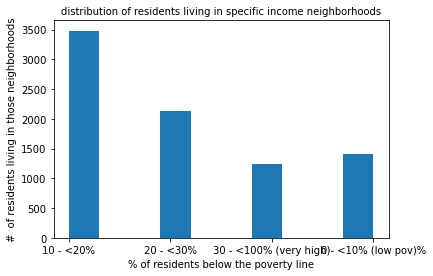

In [25]:
#shows the percent of ppl who are below poverty and their access to helathcare 
display(health_copy1.didnt_get_care.value_counts(normalize=True)*100)
display(health_copy1.insured.value_counts(normalize=True)*100)
display(health_copy1.primary_doctor.value_counts(normalize=True)*100)

group_poverty2 = health_copy1.groupby('below_poverty').primary_doctor
dr_poverty = group_poverty2.value_counts(normalize=True)*100
print(dr_poverty)

group_poverty = health_copy1.groupby('below_poverty').insured
insured_poverty= group_poverty.value_counts(normalize=True)*100
print(insured_poverty)

group_poverty3 = health_copy1.groupby('below_poverty').didnt_get_care
didnt_poverty = group_poverty3.value_counts(normalize=True)*100
print(didnt_poverty)

#histogram 
plt.hist(health_copy1['below_poverty'])
plt.xlabel('% of residents below the poverty line',fontsize=10)
plt.ylabel("#  of residents living in those neighborhoods",fontsize=10)
plt.title('distribution of residents living in specific income neighborhoods',fontsize=10)

The next analysis also did not make it into the final project because there wasn't enough data to make accurate assumptions about the correlation # total students and the percent in temporary housing. Therefore, the data was turned into a bar graph instead.

In [26]:
final_ds = pd.read_csv('final_ds.csv')

#Group by each burough so that each le_[borough] consists of its own neightborhood.
by_bronx = final_ds.loc[final_ds["borough"] == "Bronx"]
le_bronx = by_bronx.groupby("borough_and_district_#").mean()

by_brooklyn = final_ds.loc[final_ds["borough"] == "Brooklyn"]
le_brooklyn = by_brooklyn.groupby("borough_and_district_#").mean()

by_manhattan = final_ds.loc[final_ds["borough"] == "Manhattan"]
le_manhattan = by_manhattan.groupby("borough_and_district_#").mean()

by_queens = final_ds.loc[final_ds["borough"] == "Queens"]
le_queens = by_queens.groupby("borough_and_district_#").mean()

by_SI = final_ds.loc[final_ds["borough"] == "Staten Island"]
le_SI = by_SI.groupby("borough_and_district_#").mean()

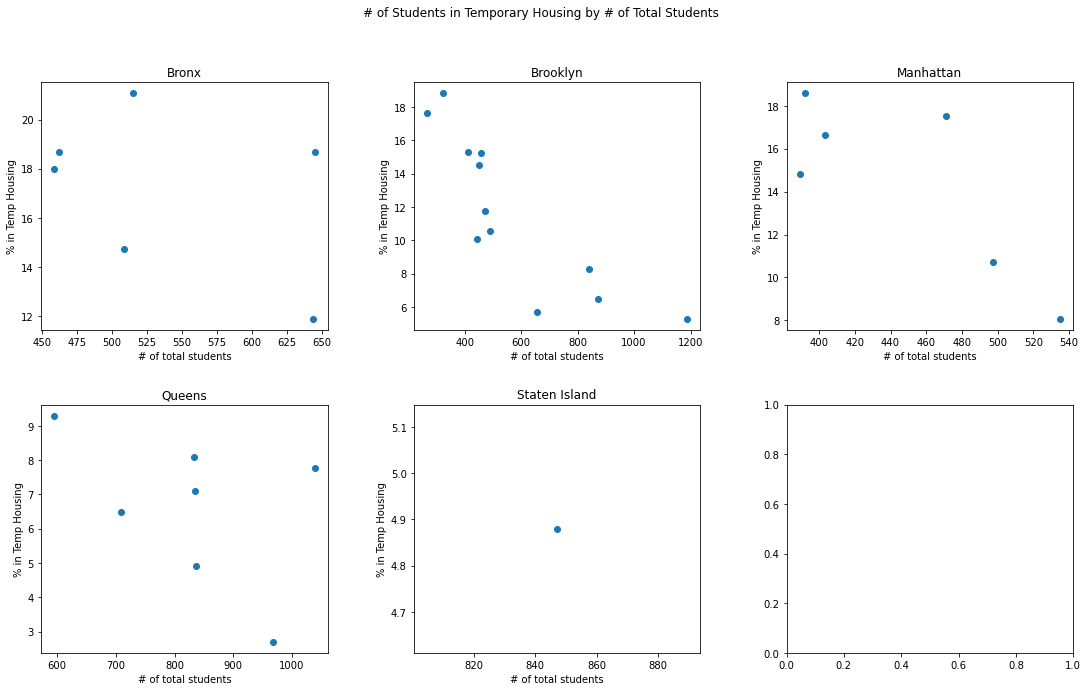

The correlation is for Bronx is -0.43
The correlation is for Brooklyn is -0.84
The correlation is for Manhattan is -0.79
The correlation is for Queens is -0.46
There is no correlation for Staten Island because there is only one point


In [27]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('# of Students in Temporary Housing by # of Total Students')

axs[0, 0].scatter(le_bronx["#_total_students"], le_bronx["%_students_in_temporary_housing"])
axs[0, 0].set_title('Bronx')
axs[0, 1].scatter(le_brooklyn["#_total_students"], le_brooklyn["%_students_in_temporary_housing"])
axs[0, 1].set_title('Brooklyn')
axs[0, 2].scatter(le_manhattan["#_total_students"], le_manhattan["%_students_in_temporary_housing"])
axs[0, 2].set_title('Manhattan')
axs[1, 0].scatter(le_queens["#_total_students"], le_queens["%_students_in_temporary_housing"])
axs[1, 0].set_title('Queens')
axs[1, 1].scatter(le_SI["#_total_students"], le_SI["%_students_in_temporary_housing"])
axs[1, 1].set_title('Staten Island')

plt.subplots_adjust(wspace=0.30, hspace=.30)
for ax in axs.flat[:-1]:
    ax.set(xlabel = "# of total students", ylabel='% in Temp Housing')   
plt.show()

print("The correlation is for Bronx is {:.2f}".format(le_bronx["#_total_students"].corr(le_bronx["%_students_in_temporary_housing"])))
print("The correlation is for Brooklyn is {:.2f}".format(le_brooklyn["#_total_students"].corr(le_brooklyn["%_students_in_temporary_housing"])))
print("The correlation is for Manhattan is {:.2f}".format(le_manhattan["#_total_students"].corr(le_manhattan["%_students_in_temporary_housing"])))
print("The correlation is for Queens is {:.2f}".format(le_queens["#_total_students"].corr(le_queens["%_students_in_temporary_housing"])))
print("There is no correlation for Staten Island because there is only one point")

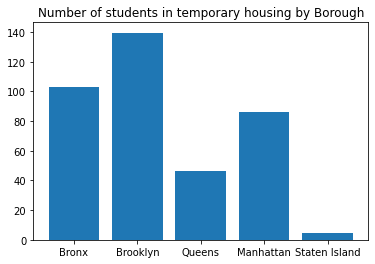

In [28]:
x1 = [sum(le_bronx["%_students_in_temporary_housing"]), sum(le_brooklyn["%_students_in_temporary_housing"]), sum(le_queens["%_students_in_temporary_housing"]), sum(le_manhattan["%_students_in_temporary_housing"]), sum(le_SI["%_students_in_temporary_housing"])]
y1 = ["Bronx", "Brooklyn", "Queens", "Manhattan", "Staten Island"]
plt.bar(y1, x1)
plt.title("Number of students in temporary housing by Borough")
plt.show()

The next set of data analysis was tossed because it would be considered data manipulation and didn't give an accurate representation of what was actually occuring in the data set. This data was origionally used wioth the purpose of showing that the Bronx and Manhattan clusters were more accuratelu predicted: however, making just two cluster divided the data into two just boroughs. This meant that the other three boroughs were being categorized into the only two clusters and were then labelled as Manhattan or the Bronx even though they were neither. The first cluster is for low_rent and rent_burdened for the Bronx and Manhattan 

[[10.23333333 53.3       ]
 [ 9.88181818 42.11818182]
 [37.37777778 62.93333333]
 [23.88571429 52.72928571]
 [16.07692308 56.71769231]]


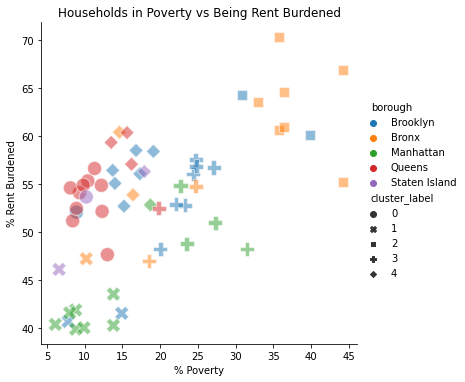

Percent of accurate boroughs:  5.1 %


In [29]:

clustering = KMeans(n_clusters = 5, random_state = 15)
clustering.fit(housing_poverty[["poverty_rate", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
sns.relplot(x='poverty_rate', y='rent_burdened', hue="borough", style ='cluster_label', s=200, alpha=.5, data=housing_poverty);
plt.xlabel("% Poverty")
plt.ylabel("% Rent Burdened")
plt.title('Households in Poverty vs Being Rent Burdened')
plt.show()
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1, 2,3,4],
                                        "predicted_borough": ["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten_Island"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

The conclusions from the clustering show that the clusters created by %rent burdened and % poverty only accurately predicted 5.1% of the boroughs. This means that these two data factors (%poverty and %rent burdened) are not a good indicator of the borough an indivual lives in. However, it is important to note that it apppears that the clustering works best on the extrema of the graph where more of the of the cluster labels align with one specific color.

[[77.38823529 53.16176471]
 [30.82222222 41.61333333]
 [95.725      60.005     ]
 [59.97       52.        ]
 [38.87142857 55.21285714]]


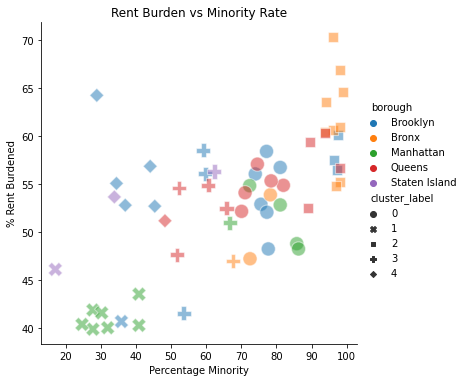

Percent of accurate boroughs:  16.9 %


In [31]:
clustering = KMeans(n_clusters = 5, random_state = 15)
clustering.fit(housing_poverty[["minority_rate", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
sns.relplot(x='minority_rate', y='rent_burdened', hue="borough", style ='cluster_label', s=200, alpha=.5, data=housing_poverty);
plt.xlabel("Percentage Minority")
plt.ylabel("% Rent Burdened")
plt.title('Rent Burden vs Minority Rate')
plt.show()
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1, 2,3,4],
                                        "predicted_borough": ["Brooklyn", "Bronx", "Manhattan", "Queens", "Staten_Island"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

The clustering that occured here does predict a few of the boroughs accurately using the two factors: percent minority and % Rent Burdened. The clustering predicted the borough right  16.9% of the time, which means that percent minority and % of rent burdened are not great determinants of the borough an indivual lives in.

In [30]:
housing_poverty = pd.read_csv('housing_poverty.csv')
clustering = KMeans(n_clusters = 2, random_state = 15)
clustering.fit(housing_poverty[["low_rent", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_borough": [ "Bronx", "Manhattan"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

[[36.00133333 56.69633333]
 [16.87       49.79137931]]
Percent of accurate boroughs:  30.5 %


This is a cluster for poverty_rate and rent_burdened for the Bronx and Manhattan. 

In [13]:
clustering = KMeans(n_clusters = 2, random_state = 15)
clustering.fit(housing_poverty[["poverty_rate", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_borough": [ "Bronx", "Manhattan"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

[[13.73023256 51.09953488]
 [32.55625    59.2225    ]]
Percent of accurate boroughs:  10.2 %


This is a cluster for poverty_rate and rent_burdened for the Bronx and Manhattan.

In [14]:
clustering = KMeans(n_clusters = 2, random_state = 15)
clustering.fit(housing_poverty[["minority_rate", "rent_burdened"]])
print(clustering.cluster_centers_)
cluster_labels = clustering.labels_
housing_poverty['cluster_label'] = cluster_labels
predicted_borough_lookup = pd.DataFrame({"cluster_label": [0, 1],
                                        "predicted_borough": [ "Bronx", "Manhattan"]})
borough_predict = pd.merge(predicted_borough_lookup, housing_poverty)
same = borough_predict.loc[borough_predict['predicted_borough'] == borough_predict['borough']]
total = len(borough_predict)
accurate = len(same)
accurate_boroughs = round((accurate/total)*100,1)
print("Percent of accurate boroughs: ",accurate_boroughs, "%")

[[84.65       55.95194444]
 [41.26086957 49.15521739]]
Percent of accurate boroughs:  32.2 %
